## Atividade prática 10

> Considere pelo menos um dos seguintes algoritmos: <br>
> - Decomposição LU (com o algoritmo de Crout-Dolittle).
> - Resolução de sistema triangular superior seguida de sistema triangular inferior.
> - Resolução de sistema linear por eliminação Gaussiana
> - ★ Resolução de sistema linear pelo método de Gauss-Seidel ou de Jacobi.
> - Cálculo de determinante por escalonamento
> - Cálculo de determinante por expansão de Laplace <br><br>
> Realize vários testes com inputs de diferentes tamanos para o algoritmo que você escolheu. Grave o tempo que o algoritmo leva para ser realizado e crie um gráfico. Faça uma regressão, utilizando um tipo apropriado de função, para dar uma estimativa empírica do <br>
>(Observação: Não há fórmula assintótica para o método de Gauss-Seidel em geral. Normalmente o tempo de execução é menor do que $O(n^2)$.) <br>
> Utilize a biblioteca matplotlib para criar gráficos. Você pode utilizar a biblioteca tqdm para exibir uma barra de carregamento nos seus laços.

In [48]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

In [49]:
def solve_determinante (A):
    '''Resolve o determinante por escalonamento
    
    Parâmetros obrigatórios
    ---------------------------
    A : Array-like de dimensao 2
        Matriz quadrada
    
    Saída
    ---------------------------
    det : float
          Determinante da matriz recebida
    '''
    n = len(A)

    # Escalonando a matriz
    for i in range(0, n):
        for j in range(i+1, n):
            coef = A[j, i]/A[i,i]
            
            A[j][:] -= coef * A[i][:]

    out = 1
    for i in range(n):
        out *= A[i, i]

    return out


In [50]:
n = 80

tabela = np.zeros((2, n + 2))

for i in range(1, n + 2):
    tabela[0, i] = i

for i in tqdm(range(2, n + 2)):

    aux = True
    while aux:
        try:
            A = (np.random.randint(-10, 10, (i,i))).astype(float)
            tempo_inicio = time.time()

            for j in range(10):
                _ = solve_determinante(A)  # Decomposição LU de $A$

            tempo_final = time.time()

            tabela[1, i] = (tempo_final - tempo_inicio) / 10
            aux = False

        except:
            pass


  0%|          | 0/80 [00:00<?, ?it/s]C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7480\2306982173.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  coef = A[j, i]/A[i,i]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7480\2306982173.py:21: RuntimeWarning: invalid value encountered in multiply
  A[j][:] -= coef * A[i][:]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7480\2306982173.py:19: RuntimeWarning: invalid value encountered in double_scalars
  coef = A[j, i]/A[i,i]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_7480\2306982173.py:25: RuntimeWarning: invalid value encountered in double_scalars
  out *= A[i, i]
100%|██████████| 80/80 [00:06<00:00, 12.39it/s] 


In [51]:
def f(a, x):
    out = 0
    for i in range(len(a)):
        out += a[i] * (x**(i))

In [52]:
tabela = tabela.transpose()
m = tabela.shape[0]
dominio = np.linspace(0, n + 1, 1000)

coeficientes = []

In [53]:
# Define a matriz de coeficientes
A = np.zeros((m, 4))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = tabela[i, 0]
    A[i, 2] = tabela[i, 0] ** 2
    A[i, 3] = tabela[i, 0] ** 3

# Define o vetor independente
b = tabela[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b

alpha = np.linalg.solve(B, c)

coeficientes.append(alpha)

print()
print("-"*30)
print("Regressão Cúbica")
print("Coefs: ", alpha)


------------------------------
Regressão Cúbica
Coefs:  [-3.14714236e-05  5.93404926e-05  2.63674054e-06 -2.80678488e-09]


In [54]:
tabela = tabela.transpose()

A = np.zeros((m, 3))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = tabela[i, 0]
    A[i, 2] = tabela[i, 0] ** 2

# Define o vetor independente
b = tabela[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b

alpha = np.linalg.solve(B, c)

coeficientes.append(alpha)

print()
print("-"*30)
print("Regressão Quadrática")
print("Coefs: ", alpha)

IndexError: index 2 is out of bounds for axis 0 with size 2


------------------------------
Regressão Linear
Coefs:  [-0.00968673  0.00044411]


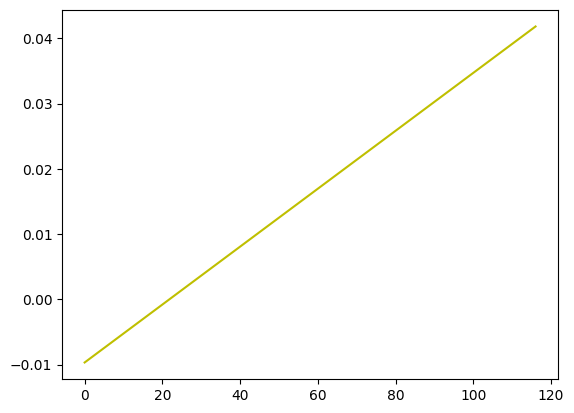

In [ ]:
A = np.zeros((m, 2))
for i in range(m):
    A[i, 0] = 1
    A[i, 1] = tabela[i, 0]

# Define o vetor independente
b = tabela[:, 1]
B = A.transpose() @ A
c = A.transpose() @ b

alpha = np.linalg.solve(B, c)

coeficientes.append(alpha)

print()
print("-"*30)
print("Regressão Linear")
print("Coefs: ", alpha)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

axs.set_title("Tempo de criação das listas")
axs.set_xlabel("Tamanho da lista")
axs.set_ylabel("Tempo (s)")
tabela = tabela.transpose()
x, y = tabela[0, :], tabela[1, :]

# Plotando os pontos
plt.plot(x, y, 'ro')
# axs.plot(x, y, 'ro',alpha=0.5, label="Testes")


im = [f(coeficientes[0], t) for t in dominio]
plt.plot(dominio, im, 'b', label="Regressão cubica")

im = [f(coeficientes[1], t)  for t in dominio]
plt.plot(dominio, im, 'g', label="Regressão quadrada")

im = [f(coeficientes[2], t)  for t in dominio]
plt.plot(dominio, im, 'y', label="Regressão linear")

plt.show()